In [5]:
from __future__ import annotations
from typing import Any 

import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from premise_selection.evaluate import EvalResult, EvalData

In [7]:
eval_data_loc = "/home/ubuntu/coq-modeling/models/premise_selection_basic/epoch=2-step=55287-eval-all-BAD-AVAIL.json"
with open(eval_data_loc, "r") as fin:
    json_eval_data = json.load(fin) 
eval_data = EvalData.from_json(json_eval_data)

In [8]:
precisions: list[float] = []
recalls: list[float] = []
ATS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for k in ATS:
    precisions.append(eval_data.precision_at(k))
    recalls.append(eval_data.recall_at(k))

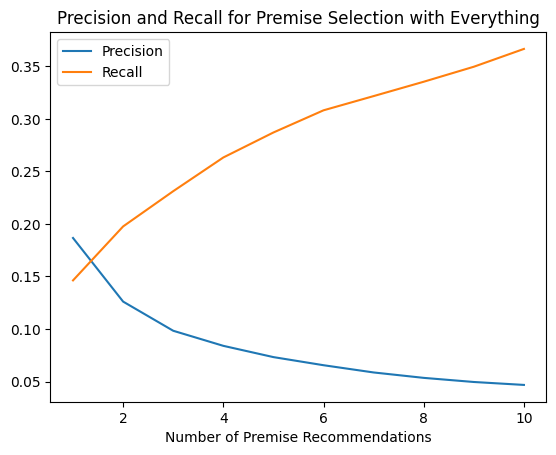

In [10]:
fig, ax = plt.subplots()
ax.plot(ATS, precisions, label="Precision")
ax.plot(ATS, recalls, label="Recall")
ax.set_xlabel("Number of Premise Recommendations")
ax.set_title("Precision and Recall for Premise Selection with Everything")
ax.legend()